# 4 - Imaging feature selection

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

## Introduction

During this step we will select the MRI imaging features that provide a good predictor of the Parkinson's disease presence in patients, with respect to healthy controls (HCs).

The analyzed MRI images were obtained from PPMI data portal and belonged to the subjects considered in our study.

**TO DO: ADD BRIEF MRI DATA DESCRIPTION**

To obtain the features well exploiting the differences between PD patients and HCs, we computed the statistical significance of linear models:
 
*Y* ~ *s* + *eTIV* + *a* + *g*

where *Y* is the imaging feature as predictor, *s* the disease status (PD or HC), *eTIV* the intercranial volume, *a* the age of the subject, and *g* the individual's gender.

To each linear model built using a different imaging feature, we assigned a *P*-value assessing how statistically significant could be the association of the considered feature to the disease in our dataset. The *P*-value computation is made in an R script called ```mriFeatureSelection.R```, which will be called via command line.

For further details on the linear models computation refer to ```mriFeatureSelection.R```.

In [2]:
mri_dir = "../../data/imaging/MRI/"

## Assigning statistical significance to MRI features

We call from command line the R script ```mriFeatureSelection.R```, which computes a linear model for each imaging feature (used as predictor of the PD presence) and assigns a *P*-value to each model, assessing how it is able to divide the two cathegories, using the considered feature.

In [3]:
!Rscript mriFeatureSelection.R

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: assertthat

Attaching package: ‘assertthat’

The following object is masked from ‘package:tibble’:

    has_name

Warning messages:
1: In model.response(mf, "numeric") :
  using type = "numeric" with a factor response will be ignored
2: In Ops.factor(y, z$residuals) : ‘-’ not meaningful for factors
3: In Ops.factor(r, 2) : ‘^’ not meaningful for factors


## Selecting the statistically significant imaging features

The output produce by ```mriFeatureSelection.R``` script is a CSV file, called ```mriFeaturesrank.csv``` containing the MRI imaging features sorted by statistical significance (*q*-values obtained correcting the *P*-values, with Benjamini-Hochberg procedure).

In [4]:
features = pd.read_csv(
    os.path.join(mri_dir, "mriFeaturesRank.csv")
)
features.head(n=10)

,Name,p,p.adj
0,TD_score,7.198337e-45,1.900361e-42
1,PIGD_score,2.145095e-18,2.831525e-16
2,rh_parahippocampal_volume,4.577313e-05,4.028035e-03
3,TD_PIGD_ratio,1.843628e-03,1.216794e-01
4,rh_entorhinal_area,2.777247e-03,1.466387e-01
5,rh_parahippocampal_thickness,4.834076e-03,2.126993e-01
6,rh_frontalpole_thickness,5.823353e-03,2.196236e-01
7,rh_parahippocampal_area,8.265958e-03,2.727766e-01
8,Right.Amygdala,1.363380e-02,3.999247e-01
9,lh_frontalpole_thickness,1.524925e-02,4.025801e-01


We then select the features with an adjusted *P*-value under a user defined threshold. In our application we choose those with *q*-value < 0.1.

In [5]:
sig_features = features[features['p.adj'] < 0.1]
sig_features["Name"].tolist()

['TD_score', 'PIGD_score', 'rh_parahippocampal_volume']

Unfortunately in our from our data we found that only the right parahippocampus volume is a valuable predictor to separate PD patients and HCs. As we can observe from values distributions displayed in the following boxplot.

In [6]:
mrifeatures = pd.read_csv(
    os.path.join(mri_dir, "mriFeatures_eu_woswedd.csv")
)
mrifeatures.head(n=10)

,PATNO,eTIV,lh_caudalanteriorcingulate_volume,lh_caudalmiddlefrontal_volume,lh_cuneus_volume,lh_entorhinal_volume,lh_fusiform_volume,lh_inferiorparietal_volume,lh_inferiortemporal_volume,lh_isthmuscingulate_volume,...,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,TD_score,PIGD_score,TD_PIGD_ratio,TD_PIGD_class,INFODT_,INFODT_bl,ENROLL_CAT
0,3000,1.569770e+06,2565.0,5700.0,3970.0,1928.0,9789.0,12025.0,9914.0,2204.0,...,9.996803e+05,9.777723e+05,973296.0,0.000000,0.0,NaN,Indeterminate,2011-02-01,2011-02-01,1
1,3001,1.715151e+06,1848.0,6032.0,3058.0,2674.0,9113.0,13595.0,12072.0,2096.0,...,1.138365e+06,1.094811e+06,1092459.0,0.272727,0.0,NaN,TD,2011-03-01,NaN,2
2,3002,1.356459e+06,1154.0,5947.0,2745.0,2023.0,10042.0,11473.0,9592.0,2338.0,...,9.026203e+05,8.838913e+05,881444.0,0.181818,0.6,0.303030,PIGD,2011-03-01,NaN,2
3,3004,1.617682e+06,2092.0,5010.0,2794.0,2410.0,10182.0,10901.0,12422.0,2341.0,...,1.074093e+06,1.056334e+06,1053446.0,0.000000,0.0,NaN,Indeterminate,2011-04-01,2011-04-01,1
4,3006,1.643901e+06,1589.0,5893.0,3013.0,2465.0,10977.0,14361.0,12061.0,2982.0,...,1.120597e+06,1.091968e+06,1089715.0,0.090909,0.2,0.454545,PIGD,2011-04-01,2011-04-01,2
5,3008,1.281808e+06,908.0,3404.0,2507.0,1774.0,9779.0,10165.0,7686.0,2077.0,...,7.901650e+05,7.530110e+05,749890.0,0.000000,0.2,0.000000,PIGD,2011-06-01,2011-06-01,1
6,3011,1.722969e+06,2452.0,7466.0,3012.0,2170.0,10222.0,14500.0,14181.0,3212.0,...,1.110978e+06,1.092647e+06,1089056.0,0.000000,0.0,NaN,Indeterminate,2011-07-01,2011-07-01,1
7,3012,1.745686e+06,2805.0,7717.0,3027.0,2531.0,11182.0,14100.0,12951.0,3811.0,...,1.171237e+06,1.141054e+06,1137124.0,1.000000,0.0,NaN,TD,2011-11-01,2011-11-01,2
8,3016,1.690582e+06,1500.0,7638.0,3387.0,3076.0,13037.0,12706.0,14916.0,2781.0,...,1.103874e+06,1.075387e+06,1071616.0,0.000000,0.0,NaN,Indeterminate,2012-02-01,2012-02-01,1
9,3018,1.553345e+06,1658.0,5570.0,2644.0,2373.0,9315.0,11720.0,11123.0,3358.0,...,9.144420e+05,8.786950e+05,876608.0,0.454545,0.2,2.272727,TD,2012-03-01,2012-03-01,2


Text(0, 0.5, 'rh_parahippocampal_volume')

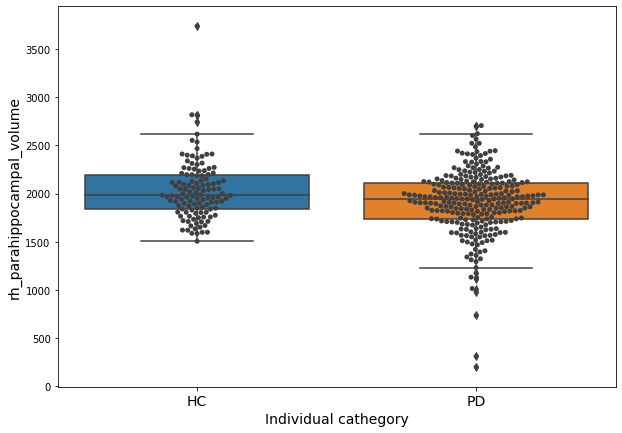

In [7]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(
    x = "ENROLL_CAT",
    y = "rh_parahippocampal_volume",
    data = mrifeatures,
)
ax = sns.swarmplot(
    x = "ENROLL_CAT",
    y = "rh_parahippocampal_volume",
    data = mrifeatures,
    color = ".25"
)
plt.xticks([0,1], ["HC", "PD"], size = 14)
plt.xlabel("Individual cathegory", size = 14)
plt.ylabel("rh_parahippocampal_volume", size = 14)

To have the same number of features used with DaTSCAN, we decide to consider also parahippocampal area (right and left) and volume (right and left). These decision were made since hippocampus and parahippocampus are believed being potential biomarkers of the disease progression.